In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('housing.csv')
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


C:\Users\lenovo\AppData\Local\Temp\ipykernel_45156\2765707891.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MEDV'])


<Axes: xlabel='MEDV', ylabel='Density'>

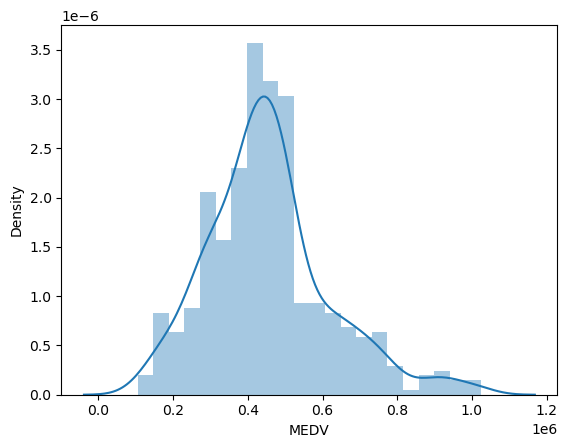

In [3]:
import seaborn as sns
sns.distplot(df['MEDV'])

it is almost normal but if we want then we may say it is right skewed

<Axes: >

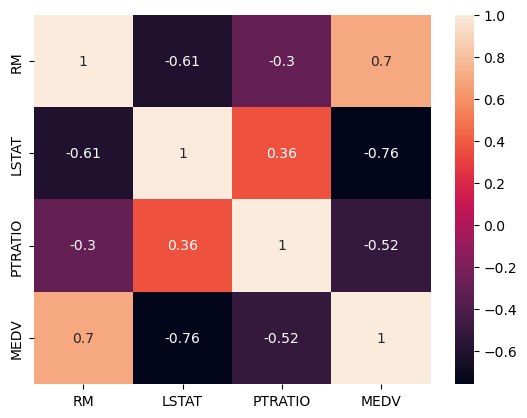

In [6]:
sns.heatmap(df.corr(), annot=True)

RM and LSTAT


Iteration 0, Error: 233709014171.77914
Iteration 100, Error: 18705475354.80987
Iteration 200, Error: 18610415995.01929
Iteration 300, Error: 18517285185.804207
Iteration 400, Error: 18426043801.00882
Iteration 500, Error: 18336653508.263103
Iteration 600, Error: 18249076752.87866
Iteration 700, Error: 18163276742.071163
Iteration 800, Error: 18079217429.50302
Iteration 900, Error: 17996863500.139496
Final parameters: w=82507.7601648656, b=-54288.4572133581


<Axes: xlabel='RM', ylabel='MEDV'>

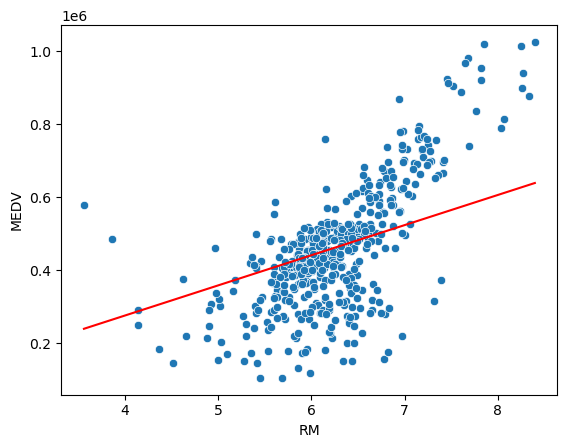

In [10]:
y = df['MEDV']
x = df['RM']

w, b = 0, 0   
learning_rate = 0.01

def calculate_error(y, y_pred):
    return np.mean((y - y_pred)**2)

for i in range(1000): 
    y_pred = w*x + b
    error = calculate_error(y, y_pred)
    
    if error < 0.001:
        break
    
    w -= learning_rate * np.mean((y_pred - y) * x)
    b -= learning_rate * np.mean(y_pred - y)
    
    if i % 100 == 0:  
        print(f"Iteration {i}, Error: {error}")

print(f"Final parameters: w={w}, b={b}")

sns.scatterplot(x='RM', y='MEDV', data=df)
sns.lineplot(x=df['RM'], y=w*df['RM'] + b, color='red')

In [21]:
r2_score = 1 - (np.sum((df['MEDV'] - y_pred) ** 2) / np.sum((df['MEDV'] - np.mean(df['MEDV'])) ** 2))
mse = calculate_error(df['MEDV'], y_pred)
rmse = np.sqrt(mse)

print(f"R^2 Score: {r2_score}, MSE: {mse}, RMSE: {rmse}")

R^2 Score: 0.6121301660173941, MSE: 10581671921.347197, RMSE: 102867.25388259957


A unit increase in x (average number of rooms, RM) means that the predicted value of y (MEDV, the median value of owner-occupied homes) increases by the value of the slope (w).

If the slope (w) is, for example, 8.5, then for each additional room in a house, the predicted median home value increases by 8.5 units (in $1000s, if that's the dataset's unit).
So, "one more room" is associated with an average increase of 8.5 × $1000 = $8,500 in the median home value, holding all else constant.

Iteration 0, Error: 233709014171.77914
Iteration 100, Error: 18700171938.16726
Iteration 200, Error: 17046169750.564163
Iteration 300, Error: 15700461147.825394
Iteration 400, Error: 14560551655.646057
Iteration 500, Error: 13594879964.473492
Iteration 600, Error: 12776804924.899836
Iteration 700, Error: 12083758990.434883
Iteration 800, Error: 11496625201.048203
Iteration 900, Error: 10999209586.947525
Iteration 1000, Error: 10577794242.289402
Iteration 1100, Error: 10220758734.085299
Iteration 1200, Error: 9918259397.826038
Iteration 1300, Error: 9661957668.923922
Iteration 1400, Error: 9444789952.377897
Iteration 1500, Error: 9260772679.451994
Iteration 1600, Error: 9104837171.259848
Iteration 1700, Error: 8972689751.768187
Iteration 1800, Error: 8860693249.573872
Iteration 1900, Error: 8765766618.103031
Iteration 2000, Error: 8685299903.91896
Iteration 2100, Error: 8617082216.407139
Iteration 2200, Error: 8559240710.922077
Iteration 2300, Error: 8510188901.433611
Iteration 2400, Er

<Axes: xlabel='RM', ylabel='MEDV'>

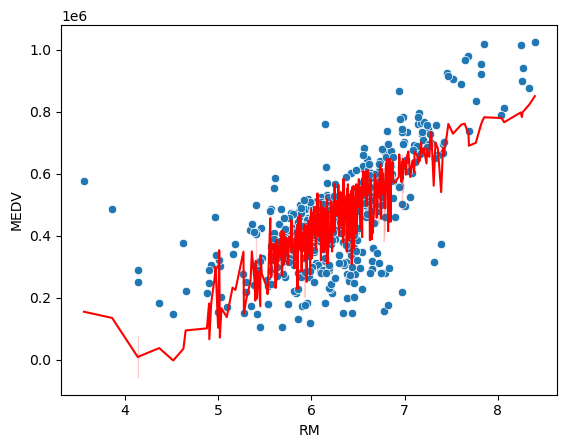

In [26]:
x1, x2, x3 = df['RM'], df['PTRATIO'], df['LSTAT']
w1, w2, w3, b = 0, 0, 0, 0

def calculate_error(y, y_pred):
    return np.mean((y - y_pred)**2)

learning_rate = 0.001

for i in range(5000):
    y_pred = w1*x1 + w2*x2 + w3*x3 + b
    error = calculate_error(df['MEDV'], y_pred)

    if error < 0.001:
        break

    w1 -= learning_rate * np.mean((y_pred - df['MEDV']) * x1)
    w2 -= learning_rate * np.mean((y_pred - df['MEDV']) * x2)
    w3 -= learning_rate * np.mean((y_pred - df['MEDV']) * x3)
    b -= learning_rate * np.mean(y_pred - df['MEDV'])

    if i % 100 == 0:
        print(f"Iteration {i}, Error: {error}")

print(f"Final parameters: w1={w1}, w2={w2}, w3={w3}, b={b}")

sns.scatterplot(x='RM', y='MEDV', data=df)
sns.lineplot(x=df['RM'], y=w1*df['RM'] + w2*df['PTRATIO'] + w3*df['LSTAT'] + b, color='red')

In [27]:
r2_score = 1 - (np.sum((df['MEDV'] - y_pred) ** 2) / np.sum((df['MEDV'] - np.mean(df['MEDV'])) ** 2))
mse = calculate_error(df['MEDV'], y_pred)
rmse = np.sqrt(mse)

print(f"R^2 Score: {r2_score}, MSE: {mse}, RMSE: {rmse}")

R^2 Score: 0.6981860608876024, MSE: 8233937793.471385, RMSE: 90741.04800734553


In [28]:
from sklearn.linear_model import LinearRegression

X = df[['RM', 'PTRATIO', 'LSTAT']]
y = df['MEDV']

model = LinearRegression()
model.fit(X, y)
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("R^2 score:", model.score(X, y))

Intercept: 415464.3965167296
Coefficients: [ 86565.23613299 -19492.11563515 -10849.34038381]
R^2 score: 0.7176275212982739


finally r2 score of multiple linear regression is better so it is a better model